In [3]:
import pandas as pd

df_zillow = pd.read_csv("/Users/corycates/Documents/GitHub/Time-Series/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df_zillow.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
largest_cities = df_zillow[df_zillow['SizeRank'] < 4]


In [5]:
# Identify columns that follow the "YYYY-MM" pattern for dates
date_columns = [col for col in largest_cities.columns if col.startswith(('1', '2'))]

# Melting the data
df_melted = largest_cities.melt(id_vars=['RegionName', 'SizeRank'], 
                                var_name='Date', 
                                value_name='HomeValue', 
                                value_vars=date_columns)

# Convert the date column to datetime format
df_melted['Date'] = pd.to_datetime(df_melted['Date'])

# Set the datetime column as the index
df_melted.set_index('Date', inplace=True)


Resample the dataframe as monthly frequency, grouped by City

In [6]:
monthly_resampled = df_melted.groupby('RegionName').resample('M').mean()


/var/folders/09/79h56n6j76v7kwxgc8kt2c5c0000gn/T/ipykernel_35096/1533340940.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_resampled = df_melted.groupby('RegionName').resample('M').mean()
/var/folders/09/79h56n6j76v7kwxgc8kt2c5c0000gn/T/ipykernel_35096/1533340940.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_resampled = df_melted.groupby('RegionName').resample('M').mean()
/var/folders/09/79h56n6j76v7kwxgc8kt2c5c0000gn/T/ipykernel_35096/1533340940.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will de

In [7]:
print(monthly_resampled.columns)



Index(['SizeRank', 'HomeValue'], dtype='object')


In [8]:
unstacked_data = monthly_resampled['HomeValue'].unstack(level=0)


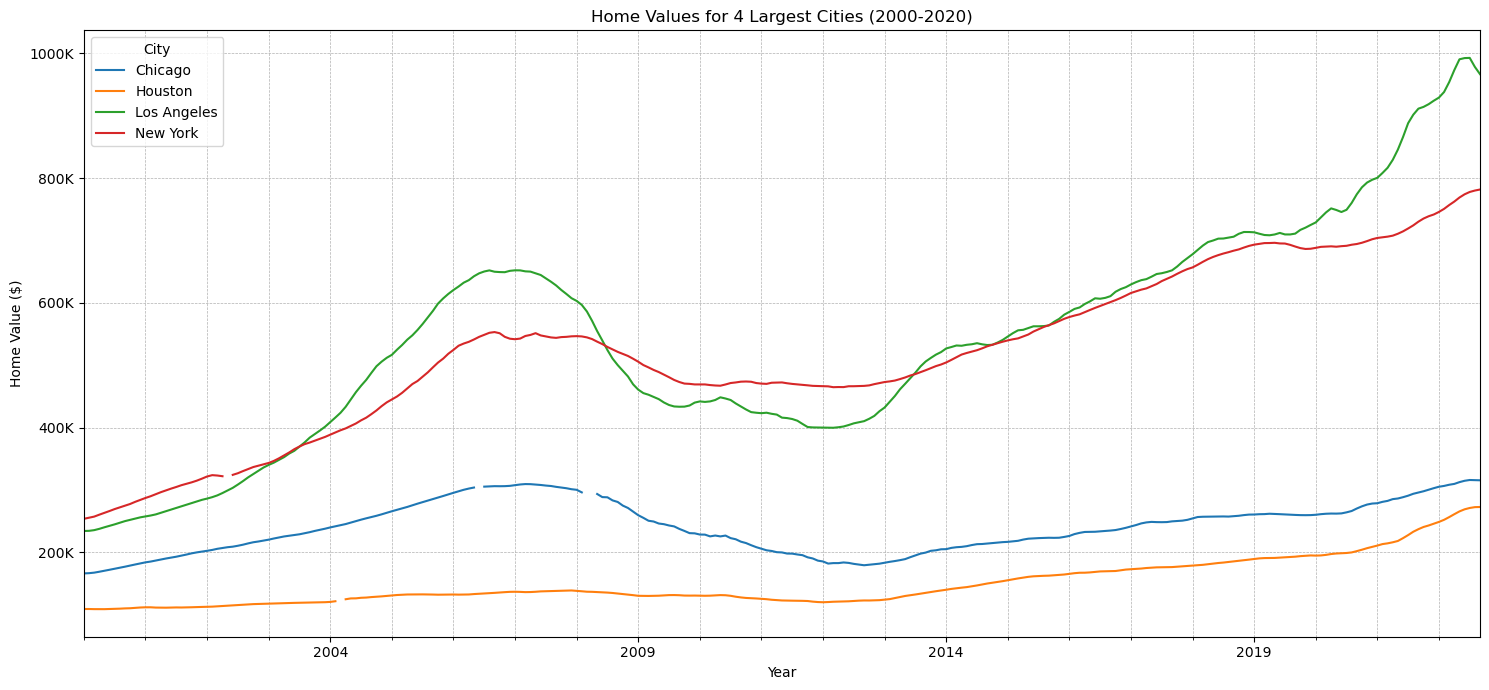

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a function to format the y-axis ticks
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

formatter = FuncFormatter(thousands_formatter)

plt.figure(figsize=(15,7))
unstacked_data.plot(ax=plt.gca())
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Home Values for 4 Largest Cities (2000-2020)")
plt.ylabel("Home Value ($)")
plt.xlabel("Year")
plt.legend(title="City")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?




In [17]:
end_2008_values = unstacked_data.loc['2008-12-31']
highest_2008_city = end_2008_values.idxmax()
lowest_2008_city = end_2008_values.idxmin()

highest_2008_value = end_2008_values.max()
lowest_2008_value = end_2008_values.min()


print(f"Highest Typical Home Value at the end of 2008: {highest_2008_city} @ {highest_2008_value}")
print(f"Lowest Typical Home Value at the end of 2008: {lowest_2008_city} @ {lowest_2008_value}")

Highest Typical Home Value at the end of 2008: New York @ 510309.0
Lowest Typical Home Value at the end of 2008: Houston @ 131283.0


Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [11]:
value_change = unstacked_data.diff().loc['2008-12-31']

print(value_change)


RegionName
Chicago        -5753.0
Houston         -964.0
Los Angeles   -12611.0
New York       -4458.0
Name: 2008-12-31 00:00:00, dtype: float64


Highest and Lowest Home Values at the end of 2008:
By examining the data for December 2008, we can identify which city had the highest typical home value and which one had the least. This provides a snapshot of the housing market health during the financial crisis.
Monthly Change in Home Values (Nov 2008 to Dec 2008):
The .diff() function allows us to compute the change in home values from November 2008 to December 2008. This month-to-month change can offer insights into short-term market dynamics during a critical period.

City with Highest Home Value: At the end of 2008, the city with the highest typical home value was [510309] with a value of [New York].

City with Lowest Home Value: The city with the lowest home value in the same period was [Houston] with a value of [131283].

Monthly Change (Nov-Dec 2008): The changes in home values from November to December 2008 for each city are as follows:
Chicago        -5753.0
Houston         -964.0
Los Angeles   -12611.0
New York       -4458.0